# Detecting payment default

## Import the libraries

In [1]:
import pandas as pd

# sklearn preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# sklearn classification algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# sklearn classification model evaluation functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

# Matplotlib for charting
import matplotlib.pyplot as plt

In [2]:
# Define a function to plot the ROC/AUC
def plotRocAuc(model, X, y):
    
    probabilities = model.predict_proba(X)
    probabilities = probabilities[:, 1]  # keep probabilities for first class only
        
    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y, probabilities)    
    auc = roc_auc_score(y, probabilities)
    
    # Plot the "dumb model" line
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # Plot the model line
    plt.plot(fpr, tpr, marker='.')
    plt.text(0.75, 0.25, "AUC: " + str(round(auc,2)))
    
    # show the plot
    plt.show()
    
    return auc

## Define the task
Make prediction about customers who're likely to default their payments after one months given limited balance.

## Load and understand the data

In [3]:
# Import file 
df = pd.read_csv('C:/Users/MyPC/MyPython/Data-Science-Projects-with-Python-master/Data/Data-Science-Projects-with-Python-master/Data/Chapter_1_cleaned_data.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


In [5]:
df.shape

(26664, 31)

In [6]:
df.isnull().mean()

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_1                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
EDUCATION_CAT                 0.0
graduate school               0.0
high school                   0.0
none                          0.0
others        

## Prepare the data

### Split into X and y

In [13]:
X = df[['PAY_1','LIMIT_BAL']].values
y = df['default payment next month'].values

### Rescale

In [14]:
# Rescale the input features
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

## Build models

### Split into test and training sets

In [16]:
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Create multiple models

LogisticRegression
[[16092   485]
 [ 3567  1187]]
0.8100417233134874
              precision    recall  f1-score   support

 not default       0.82      0.97      0.89     16577
     default       0.71      0.25      0.37      4754

    accuracy                           0.81     21331
   macro avg       0.76      0.61      0.63     21331
weighted avg       0.79      0.81      0.77     21331



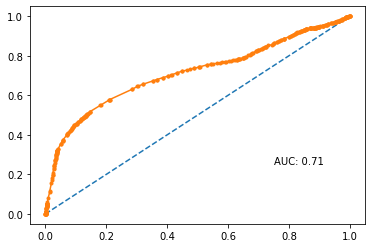

DecisionTreeClassifier
[[15963   614]
 [ 3201  1553]]
0.8211523135342929
              precision    recall  f1-score   support

 not default       0.83      0.96      0.89     16577
     default       0.72      0.33      0.45      4754

    accuracy                           0.82     21331
   macro avg       0.77      0.64      0.67     21331
weighted avg       0.81      0.82      0.79     21331



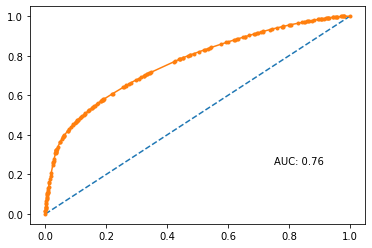

DecisionTreeClassifier
[[15926   651]
 [ 3202  1552]]
0.8193708686887629
              precision    recall  f1-score   support

 not default       0.83      0.96      0.89     16577
     default       0.70      0.33      0.45      4754

    accuracy                           0.82     21331
   macro avg       0.77      0.64      0.67     21331
weighted avg       0.80      0.82      0.79     21331



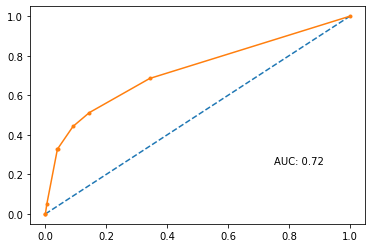

GaussianNB
[[15945   632]
 [ 3245  1509]]
0.8182457456284281
              precision    recall  f1-score   support

 not default       0.83      0.96      0.89     16577
     default       0.70      0.32      0.44      4754

    accuracy                           0.82     21331
   macro avg       0.77      0.64      0.66     21331
weighted avg       0.80      0.82      0.79     21331



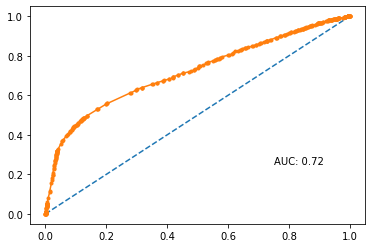

KNeighborsClassifier
[[15142  1435]
 [ 2817  1937]]
0.8006656978106981
              precision    recall  f1-score   support

 not default       0.84      0.91      0.88     16577
     default       0.57      0.41      0.48      4754

    accuracy                           0.80     21331
   macro avg       0.71      0.66      0.68     21331
weighted avg       0.78      0.80      0.79     21331



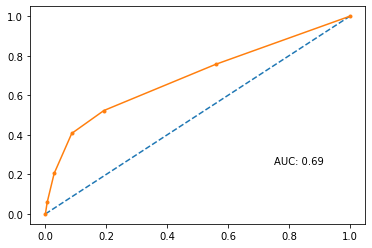

In [17]:
models = [LogisticRegression(), DecisionTreeClassifier(), DecisionTreeClassifier(max_depth=3),
          GaussianNB(), KNeighborsClassifier()]

for model in models:
    print(type(model).__name__)
    
    model.fit(X_train, y_train)
    
    # Predict the training data
    predictions = model.predict(X_train)
    
    # Plot the confusion matrix
    print(confusion_matrix(y_train, predictions))
    
    # Accuracy score
    print(accuracy_score(y_train, predictions))
    
    # Classification report
    print(classification_report(y_train, predictions, target_names=['not default','default']))
    
    # ROC / AUC
    plotRocAuc(model, X_train, y_train)
    

## Evaluate models

LogisticRegression
-------------------------------


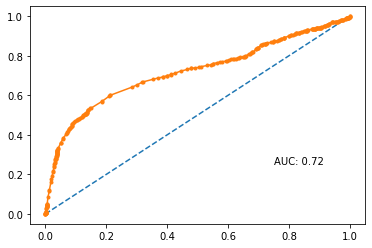

DecisionTreeClassifier
-------------------------------


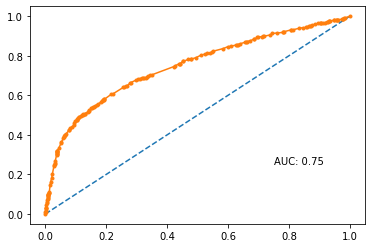

DecisionTreeClassifier
-------------------------------


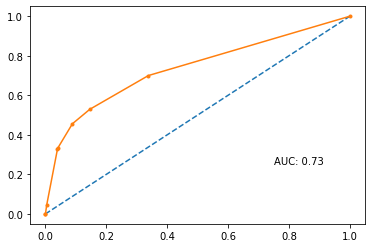

GaussianNB
-------------------------------


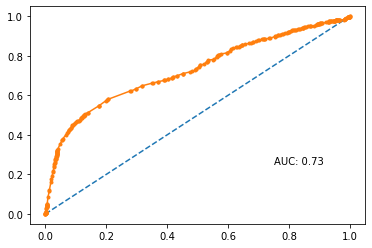

KNeighborsClassifier
-------------------------------


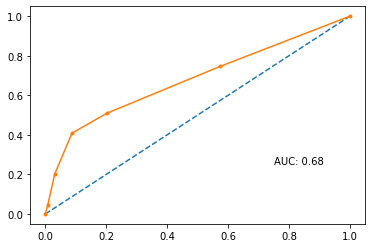

In [18]:
# Create lists to hold the results
precision_recalls = []
aucs = []
accuracies = []

for model in models:
    print(type(model).__name__)
    print("-------------------------------")
    
    # Predict the test data
    predictions = model.predict(X_test)
    
    # Get the various evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision_recall_fscore = precision_recall_fscore_support(y_test, predictions)
    auc = plotRocAuc(model, X_test, y_test)
    
    # Add the metrics to the list
    accuracies.append(accuracy)
    precision_recalls.append(precision_recall_fscore)
    aucs.append(auc)

### Select the model with optimized precision

In [19]:
print("Accuracy")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(accuracies[i],2))
    
print("\nPrecision")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(precision_recalls[i][0][1],2))

print("\nRecall")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(precision_recalls[i][1][1],2))
    
print("\nF1")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(precision_recalls[i][2][1],2))
    
print("\nAuc")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(aucs[i],2))

Accuracy
LogisticRegression 	 0.81
DecisionTreeClassifier 	 0.82
DecisionTreeClassifier 	 0.82
GaussianNB 	 0.82
KNeighborsClassifier 	 0.8

Precision
LogisticRegression 	 0.7
DecisionTreeClassifier 	 0.69
DecisionTreeClassifier 	 0.7
GaussianNB 	 0.69
KNeighborsClassifier 	 0.57

Recall
LogisticRegression 	 0.26
DecisionTreeClassifier 	 0.32
DecisionTreeClassifier 	 0.33
GaussianNB 	 0.31
KNeighborsClassifier 	 0.41

F1
LogisticRegression 	 0.38
DecisionTreeClassifier 	 0.44
DecisionTreeClassifier 	 0.45
GaussianNB 	 0.43
KNeighborsClassifier 	 0.47

Auc
LogisticRegression 	 0.72
DecisionTreeClassifier 	 0.75
DecisionTreeClassifier 	 0.73
GaussianNB 	 0.73
KNeighborsClassifier 	 0.68
